# News Bias Detection - Data Visualization

This notebook provides comprehensive visualizations for the BEAD (Bias and Emotion Analysis Dataset) used in our news bias detection project.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [16]:
# Load dataset
df = pd.read_csv('data/bead_full_dataset.csv')
print(f"Dataset loaded: {len(df):,} samples")
print(f"Columns: {list(df.columns)}")
df.head()

Dataset loaded: 3,674,927 samples
Columns: ['text', 'dimension', 'biased_words', 'aspect', 'label', 'sentiment', 'toxic', 'identity_mention']


,text,dimension,biased_words,aspect,label,sentiment,toxic,identity_mention
0,Where will this leave the kids??? That my frie...,Ageism and sentiment,[],Transphobia,Slightly Biased,Negative,0.0,NO
1,I had a feeling of impending doom &amp; then ...,Ageism and sentiment,"['impending', 'doom']",Climate change,Highly Biased,Negative,1.0,NO
2,I no feel good ..,Ageism and sentiment,[],Body-shaming,Neutral,Positive,0.0,NO
3,"Back in Hotlanta for a about a week, then off ...",Ageism and sentiment,[],Lifestyle,Slightly Biased,Negative,0.0,NO
4,Kids toys &amp; stamping stuff cleaned up... N...,Ageism and sentiment,[],Hobby,Neutral,Neutral,1.0,NO


In [17]:
# Add derived features
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
if df['biased_words'].dtype == 'object':
    df['biased_words_count'] = df['biased_words'].apply(lambda x: len(eval(x)) if pd.notna(x) and x != '[]' else 0)
else:
    df['biased_words_count'] = df['biased_words'].apply(len)
df['has_biased_words'] = df['biased_words_count'] > 0

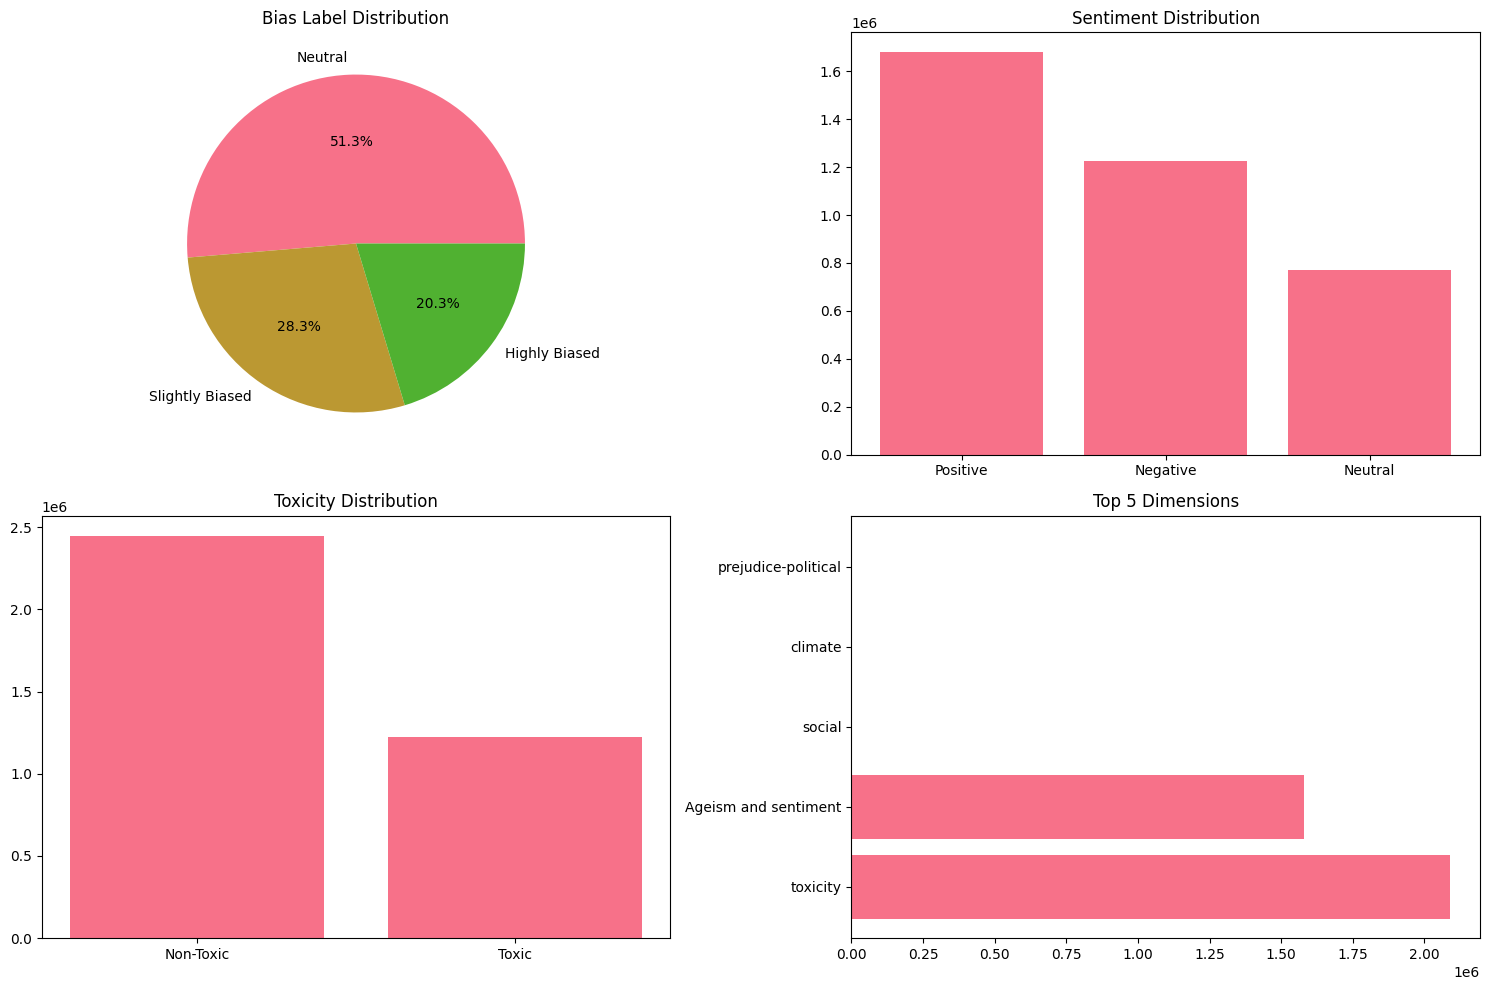

In [18]:
# Label Distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bias labels
label_counts = df['label'].value_counts()
axes[0,0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Bias Label Distribution')

# Sentiment
sentiment_counts = df['sentiment'].value_counts()
axes[0,1].bar(sentiment_counts.index, sentiment_counts.values)
axes[0,1].set_title('Sentiment Distribution')

# Toxicity
toxic_counts = df['toxic'].value_counts()
axes[1,0].bar(['Non-Toxic', 'Toxic'], toxic_counts.values)
axes[1,0].set_title('Toxicity Distribution')

# Top dimensions
top_dims = df['dimension'].value_counts().head(5)
axes[1,1].barh(range(len(top_dims)), top_dims.values)
axes[1,1].set_yticks(range(len(top_dims)))
axes[1,1].set_yticklabels(top_dims.index)
axes[1,1].set_title('Top 5 Dimensions')

plt.tight_layout()
plt.show()

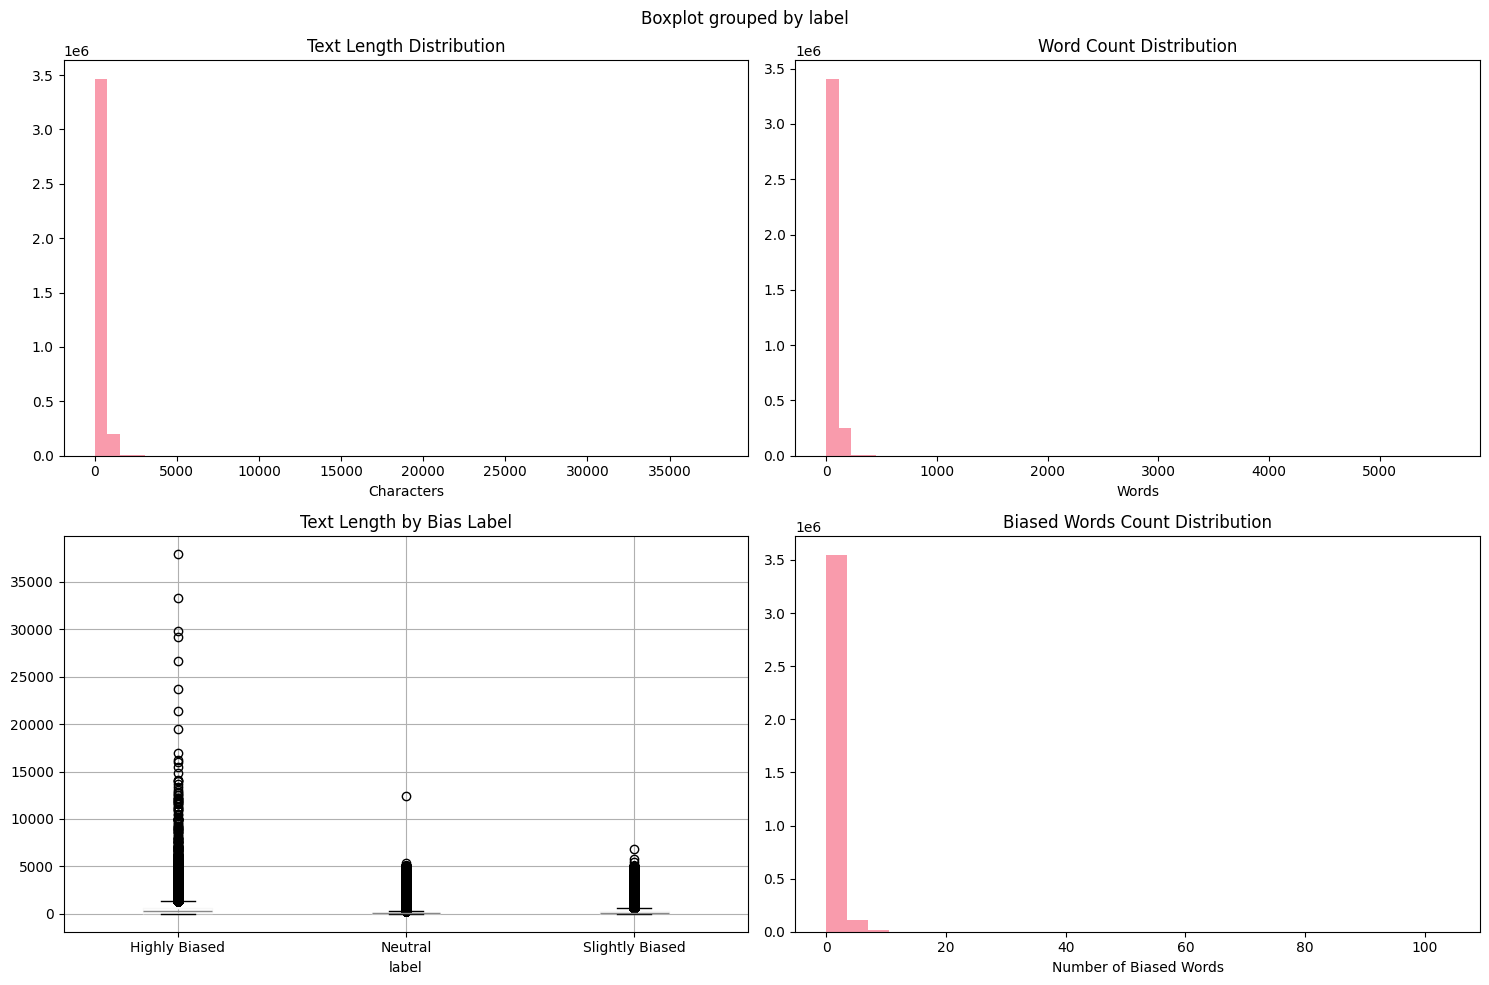

In [19]:
# Text Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length distribution
axes[0,0].hist(df['text_length'], bins=50, alpha=0.7)
axes[0,0].set_title('Text Length Distribution')
axes[0,0].set_xlabel('Characters')

# Word count distribution
axes[0,1].hist(df['word_count'], bins=50, alpha=0.7)
axes[0,1].set_title('Word Count Distribution')
axes[0,1].set_xlabel('Words')

# Text length by bias
df.boxplot(column='text_length', by='label', ax=axes[1,0])
axes[1,0].set_title('Text Length by Bias Label')

# Biased words count
axes[1,1].hist(df['biased_words_count'], bins=30, alpha=0.7)
axes[1,1].set_title('Biased Words Count Distribution')
axes[1,1].set_xlabel('Number of Biased Words')

plt.tight_layout()
plt.show()

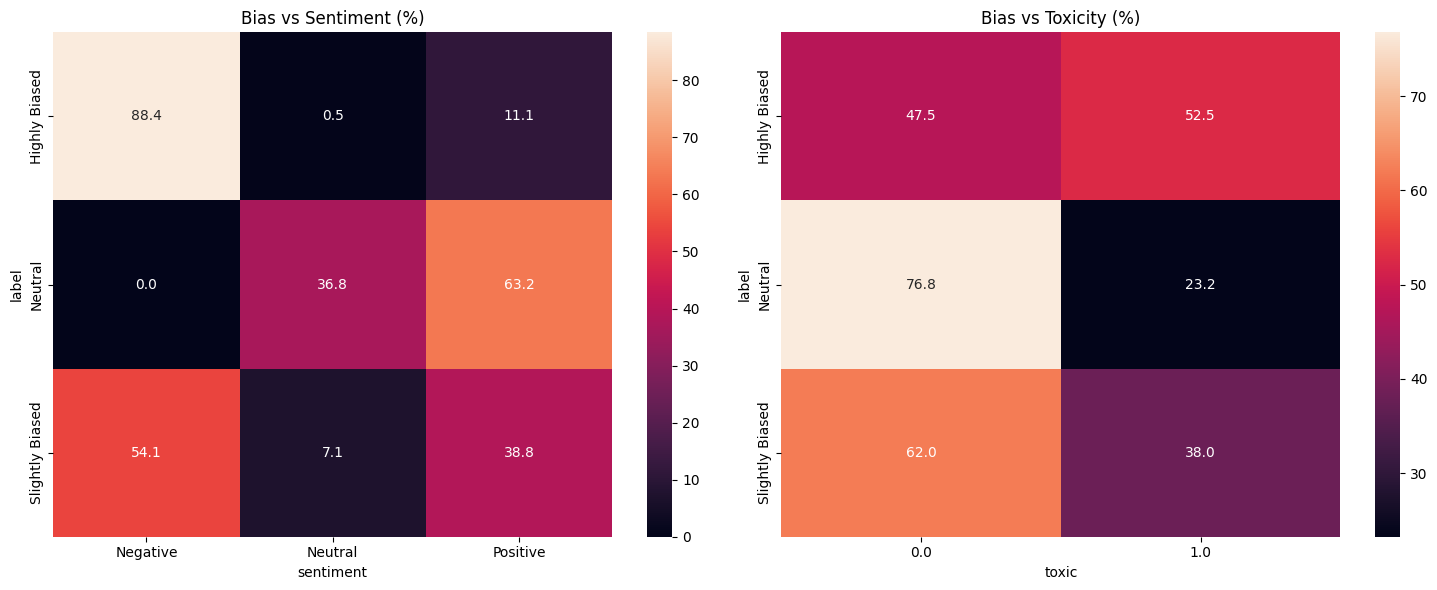

In [20]:
# Cross-Analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bias vs Sentiment
crosstab = pd.crosstab(df['label'], df['sentiment'], normalize='index') * 100
sns.heatmap(crosstab, annot=True, fmt='.1f', ax=axes[0])
axes[0].set_title('Bias vs Sentiment (%)')

# Bias vs Toxicity
crosstab2 = pd.crosstab(df['label'], df['toxic'], normalize='index') * 100
sns.heatmap(crosstab2, annot=True, fmt='.1f', ax=axes[1])
axes[1].set_title('Bias vs Toxicity (%)')

plt.tight_layout()
plt.show()

In [21]:
# Summary Statistics
print("=== DATASET SUMMARY ===")
print(f"Total samples: {len(df):,}")
print(f"Unique dimensions: {df['dimension'].nunique()}")
print(f"Average text length: {df['text_length'].mean():.0f} characters")
print(f"Average word count: {df['word_count'].mean():.0f} words")
print(f"Texts with biased words: {(df['biased_words_count'] > 0).mean()*100:.1f}%")
print(f"Toxic content: {(df['toxic'] == 1.0).mean()*100:.1f}%")

print("\n=== LABEL DISTRIBUTION ===")
for label, count in df['label'].value_counts().items():
    print(f"{label}: {count:,} ({count/len(df)*100:.1f}%)")

=== DATASET SUMMARY ===
Total samples: 3,674,927
Unique dimensions: 6
Average text length: 211 characters
Average word count: 36 words
Texts with biased words: 33.3%
Toxic content: 33.4%

=== LABEL DISTRIBUTION ===
Neutral: 1,886,253 (51.3%)
Slightly Biased: 1,041,254 (28.3%)
Highly Biased: 747,420 (20.3%)
